In [2]:
import folium
import numpy as np
import pandas as pd
from scipy import constants as ct
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [3]:
data=pd.read_csv(r"C:\Users\Kartik\Desktop\RFI SPACE\aus full samp.csv")

In [4]:
data.head()



,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,Licence Number,...,Lat,Unnamed: 13,Unnamed: 14,Unnamed: 15,Long,Unnamed: 17,Unnamed: 18,Unnamed: 19,LATITUDE,LONGITUDE
0,Adelaide,5ADL,91.9,Commercial,M,60,DA,20000,10010794,1170890,...,34,58,44,NaN,138,42,31,NaN,34.978889,138.708611
1,Adelaide,5FBI,92.7,Community,M,45,DA,20000,3371001,1170715,...,34,58,48,NaN,138,42,28,NaN,34.980000,138.707778
2,Adelaide,5DDD,93.7,Community,M,45,OD,6300,3076001,1385198,...,34,58,48,NaN,138,42,28,NaN,34.980000,138.707778
3,Adelaide,5UV,101.5,Community,M,60,DA,20000,6457001,1156865,...,34,58,44,NaN,138,42,31,NaN,34.978889,138.708611
4,Adelaide,5ADD,102.3,Commercial,M,60,DA,20000,4191001,1911525,...,34,58,57,NaN,138,42,30,NaN,34.982500,138.708333


In [6]:

data['LATITUDE']= data['LATITUDE']*-1

"""Setting up Folium Map"""
map = folium.Map(location=[-25.274398, 133.775136],zoom_start=4)


for i in range(0,len(data)):
     folium.Marker([data.iloc[i]['LATITUDE'], data.iloc[i]['LONGITUDE']]).add_to(map)

In [5]:
""" Converting ERP to EIRP in KW """

data['EIRP']=( 1.64 * data['Maximum ERP (W)'] ) /1000        

''' creating 10 evenly placed log scale between 400-36000km   '''

r=np.logspace(np.log10(400),np.log10(36000),10)       



In [6]:
"""Calculating Power received at various heights stored in r using friss equation"""
pr=np.zeros((10,len(data)))
for j in range(0,len(r)):
    for i in range(0,len(data)):
        pr[j][i]=  (data.iloc[i]['EIRP']) *(ct.c*ct.c) / (4*np.pi *r[j] * (data.iloc[i]['Frequency(MHz)'] )**2 ) 
    
          
    


[[6.94407450e+10 6.82473709e+10 2.10415034e+10 ... 5.62592463e+08
  1.05783674e+09 7.32148747e+07]
 [4.21188316e+10 4.13949983e+10 1.27625868e+10 ... 3.41236794e+08
  6.41623986e+08 4.44080054e+07]
 [2.55469030e+10 2.51078666e+10 7.74106391e+09 ... 2.06974955e+08
  3.89172850e+08 2.69353864e+07]
 ...
 [2.09723924e+09 2.06119713e+09 6.35492413e+08 ... 1.69913354e+07
  3.19486308e+07 2.21122496e+06]
 [1.27206680e+09 1.25020570e+09 3.85453784e+08 ... 1.03059838e+07
  1.93782339e+07 1.34120409e+06]
 [7.71563833e+08 7.58304122e+08 2.33794482e+08 ... 6.25102737e+06
  1.17537416e+07 8.13498608e+05]]


In [7]:
"""Storing the data and adding it to the database"""
data['Power at 400km']= pr[0]
data['Power at 659.47km']= pr[1]
data['Power at 1087.26km']= pr[2]
data['Power at 1792.56km']= pr[3]
data['Power at 2955.37km']= pr[4]
data['Power at 4872.48km']= pr[5]
data['Power at 8033.19km']= pr[6]
data['Power at 13244.22km']= pr[7]
data['Power at 21835.56km']= pr[8]
data['Power at 36000km']= pr[9]

data.to_csv("Au with power.csv")

In [8]:
P=np.transpose(pr)
""" After transpose each column is the power radiated of an inidividual fm site at various height"""




' After transpose each column is the power radiated of an inidividual fm site at various height'

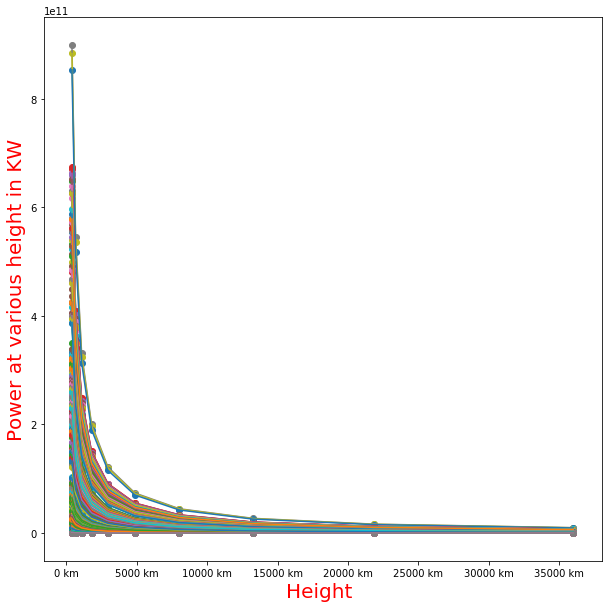

In [12]:
plt.figure(figsize=(10,10))
plt.xlabel('Height ', color='red',size=20)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d km'))

plt.ylabel('Power at various height in KW', color='red', size=20)
x=r
for i in range(0,len(data)):
  plt.plot(x,P[i])
  plt.scatter(x,P[i])
plt.show() 

In [10]:
data

,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,Licence Number,...,Power at 400km,Power at 659.47km,Power at 1087.26km,Power at 1792.56km,Power at 2955.37km,Power at 4872.48km,Power at 8033.19km,Power at 13244.22km,Power at 21835.56km,Power at 36000km
0,Adelaide,5ADL,91.9,Commercial,M,60,DA,20000,10010794,1170890,...,6.944074e+10,4.211883e+10,2.554690e+10,1.549531e+10,9.398578e+09,5.700646e+09,3.457690e+09,2.097239e+09,1.272067e+09,7.715638e+08
1,Adelaide,5FBI,92.7,Community,M,45,DA,20000,3371001,1170715,...,6.824737e+10,4.139500e+10,2.510787e+10,1.522901e+10,9.237059e+09,5.602678e+09,3.398268e+09,2.061197e+09,1.250206e+09,7.583041e+08
2,Adelaide,5DDD,93.7,Community,M,45,OD,6300,3076001,1385198,...,2.104150e+10,1.276259e+10,7.741064e+09,4.695292e+09,2.847899e+09,1.727374e+09,1.047728e+09,6.354924e+08,3.854538e+08,2.337945e+08
3,Adelaide,5UV,101.5,Community,M,60,DA,20000,6457001,1156865,...,5.692635e+10,3.452830e+10,2.094292e+10,1.270279e+10,7.704795e+09,4.673293e+09,2.834556e+09,1.719281e+09,1.042819e+09,6.325150e+08
4,Adelaide,5ADD,102.3,Commercial,M,60,DA,20000,4191001,1911525,...,5.603948e+10,3.399038e+10,2.061665e+10,1.250489e+10,7.584761e+09,4.600487e+09,2.790396e+09,1.692496e+09,1.026573e+09,6.226609e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,Yulara,8ABCRR,99.7,Retransmission,V,17,OD,320,1777010,1153878,...,9.440067e+08,5.725811e+08,3.472953e+08,2.106497e+08,1.277682e+08,7.749698e+07,4.700529e+07,2.851075e+07,1.729301e+07,1.048896e+07
2634,Yulara,8HA,100.5,Retransmission,V,17,OD,320,4225002,1153879,...,9.290375e+08,5.635017e+08,3.417883e+08,2.073094e+08,1.257422e+08,7.626811e+07,4.625992e+07,2.805866e+07,1.701879e+07,1.032264e+07
2635,Yulara,8KIN,102.1,Retransmission,V,27,OD,200,10007648,1152217,...,5.625925e+08,3.412368e+08,2.069750e+08,1.255393e+08,7.614505e+07,4.618528e+07,2.801338e+07,1.699134e+07,1.030598e+07,6.251027e+06
2636,Yulara,NaN,105.3,HPON,V,17,OD,400,10004023,1171078,...,1.057837e+09,6.416240e+08,3.891728e+08,2.360503e+08,1.431747e+08,8.684171e+07,5.267327e+07,3.194863e+07,1.937823e+07,1.175374e+07
